In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df2 = pd.read_csv("K2/concat=100+replicate=1-100+ext=.csv")
df2["k"] = 2
df4 = pd.read_csv("K4/concat=100+replicate=1-100+ext=.csv")
df4["k"] = 4
df8 = pd.read_csv("K8/concat=100+replicate=1-100+ext=.csv")
df8["k"] = 8

df = pd.concat([df2, df4, df8])

In [29]:
df

,update,mean_fitness,min_fitness,max_fitness,inferiority,replicate,k
0,0,46.316,0,256,0.180922,100,2
1,0,45.954,0,256,0.179508,10,2
2,0,47.909,0,256,0.187145,11,2
3,0,47.056,0,256,0.183812,12,2
4,0,47.067,0,256,0.183855,13,2
...,...,...,...,...,...,...,...
33578,62,220.709,36,224,0.985308,9,8
33579,63,219.211,87,224,0.978621,9,8
33580,64,219.764,55,224,0.981089,9,8
33581,65,219.749,35,224,0.981022,9,8


In [31]:
new_rows = []
for (replicate, k), filtered in df.groupby(["replicate", "k"]):    
    max_update = filtered["update"].max()

    for update in range(max_update, 10000):
        new_rows.append({
            "update": update,
            "max_fitness": 256,
            "replicate": replicate,
            "k": k
        }) 
        
df = df.append(new_rows)
df

,update,mean_fitness,min_fitness,max_fitness,inferiority,replicate,k
0,0,46.316,0.0,256,0.180922,100,2
1,0,45.954,0.0,256,0.179508,10,2
2,0,47.909,0.0,256,0.187145,11,2
3,0,47.056,0.0,256,0.183812,12,2
4,0,47.067,0.0,256,0.183855,13,2
...,...,...,...,...,...,...,...
2959798,9995,NaN,NaN,256,NaN,100,8
2959799,9996,NaN,NaN,256,NaN,100,8
2959800,9997,NaN,NaN,256,NaN,100,8
2959801,9998,NaN,NaN,256,NaN,100,8


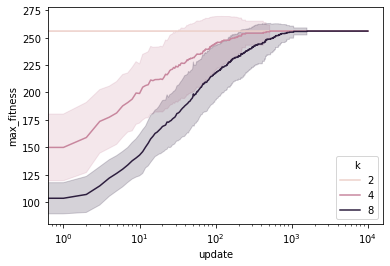

In [34]:
g = sns.lineplot(data=df, x="update", y="max_fitness", hue="k", ci="sd")
g.set_xscale("log")

In [37]:
box_df = df[df["max_fitness"] == 256]

res_df = []
for (replicate, k), filtered in box_df.groupby(["replicate", "k"]):
    sol_time = filtered["update"].min()
    
    res_df.append({
        "solution_time": sol_time,
        "replicate": replicate,
        "k": k
    })
    
res_df = df.from_records(res_df)

<AxesSubplot:xlabel='k', ylabel='solution_time'>

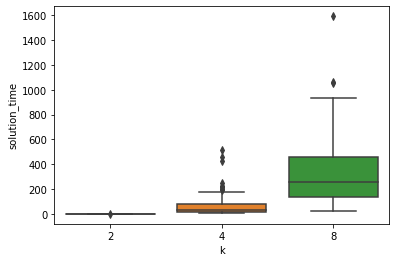

In [38]:
sns.boxplot(data=res_df, y="solution_time", x="k")